In [1]:
import fastf1
from fastf1 import plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd
import os

In [2]:
if not os.path.exists('cache'):
    os.makedirs('cache')
else:
    print('cache dir exist')

# Setup plotting
plotting.setup_mpl()

# Enable the cache
fastf1.Cache.enable_cache('cache') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None

In [11]:
sessions = fastf1.get_session(2024, 'Canada', 'R')
sessions.load(laps=True, telemetry=True, weather=True)

drive_1 = 'VER'
drive_2 = 'NOR'

colour_1 = fastf1.plotting.team_color('RBR')
colour_2 = fastf1.plotting.team_color('MCL')

plot_title = "Max v/s Lando. Canada 2023, Race"
second_plot_title = 'Max Verstappen(1) Lap Gear Visualization'

speedmap_first_title = 'Max Verstappen Speed Map'

first = sessions.laps.pick_driver(drive_1).pick_fastest()
second = sessions.laps.pick_driver(drive_2).pick_fastest()

core           INFO 	Loading data for Canadian Grand Prix - Race [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '63', '44', '81', '14', '18', '3', '10', '31', '27', '20', '77', '22', '24', '55', '23', '11', '16', '2']


In [12]:
first_car_data = first.get_car_data().add_distance()
first_car_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2024-06-09 19:47:44.552,11197,285,7,100,False,0,car,0 days 00:00:00.287000,0 days 02:41:28.937000,22.720833
1,2024-06-09 19:47:44.712,11207,285,7,100,False,0,car,0 days 00:00:00.447000,0 days 02:41:29.097000,35.387500
2,2024-06-09 19:47:44.992,11164,285,7,100,False,0,car,0 days 00:00:00.727000,0 days 02:41:29.377000,57.554167
3,2024-06-09 19:47:45.272,11193,285,7,100,False,0,car,0 days 00:00:01.007000,0 days 02:41:29.657000,79.720833
4,2024-06-09 19:47:45.472,11166,286,7,100,False,0,car,0 days 00:00:01.207000,0 days 02:41:29.857000,95.609722
...,...,...,...,...,...,...,...,...,...,...,...
283,2024-06-09 19:48:58.872,10927,278,7,100,False,0,car,0 days 00:01:14.607000,0 days 02:42:43.257000,4282.116667
284,2024-06-09 19:48:59.072,11000,280,7,100,False,0,car,0 days 00:01:14.807000,0 days 02:42:43.457000,4297.672222
285,2024-06-09 19:48:59.232,11033,281,7,100,False,0,car,0 days 00:01:14.967000,0 days 02:42:43.617000,4310.161111
286,2024-06-09 19:48:59.513,11096,283,7,100,False,0,car,0 days 00:01:15.248000,0 days 02:42:43.898000,4332.250833


In [13]:
second_car_data = second.get_car_data().add_distance()
second_car_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2024-06-09 19:44:00.072,11383,285,7,99,False,0,car,0 days 00:00:00.114000,0 days 02:37:44.457000,9.025000
1,2024-06-09 19:44:00.352,11456,287,7,99,False,0,car,0 days 00:00:00.394000,0 days 02:37:44.737000,31.347222
2,2024-06-09 19:44:00.672,11530,288,7,99,False,0,car,0 days 00:00:00.714000,0 days 02:37:45.057000,56.947222
3,2024-06-09 19:44:00.912,11530,288,7,99,False,0,car,0 days 00:00:00.954000,0 days 02:37:45.297000,76.147222
4,2024-06-09 19:44:01.272,11482,288,7,99,False,0,car,0 days 00:00:01.314000,0 days 02:37:45.657000,104.947222
...,...,...,...,...,...,...,...,...,...,...,...
280,2024-06-09 19:45:14.432,10906,275,7,99,False,0,car,0 days 00:01:14.474000,0 days 02:38:58.817000,4220.734444
281,2024-06-09 19:45:14.592,11072,277,7,100,False,0,car,0 days 00:01:14.634000,0 days 02:38:58.977000,4233.045556
282,2024-06-09 19:45:14.952,11149,281,7,99,False,0,car,0 days 00:01:14.994000,0 days 02:38:59.337000,4261.145556
283,2024-06-09 19:45:15.152,11304,283,7,99,False,0,car,0 days 00:01:15.194000,0 days 02:38:59.537000,4276.867778


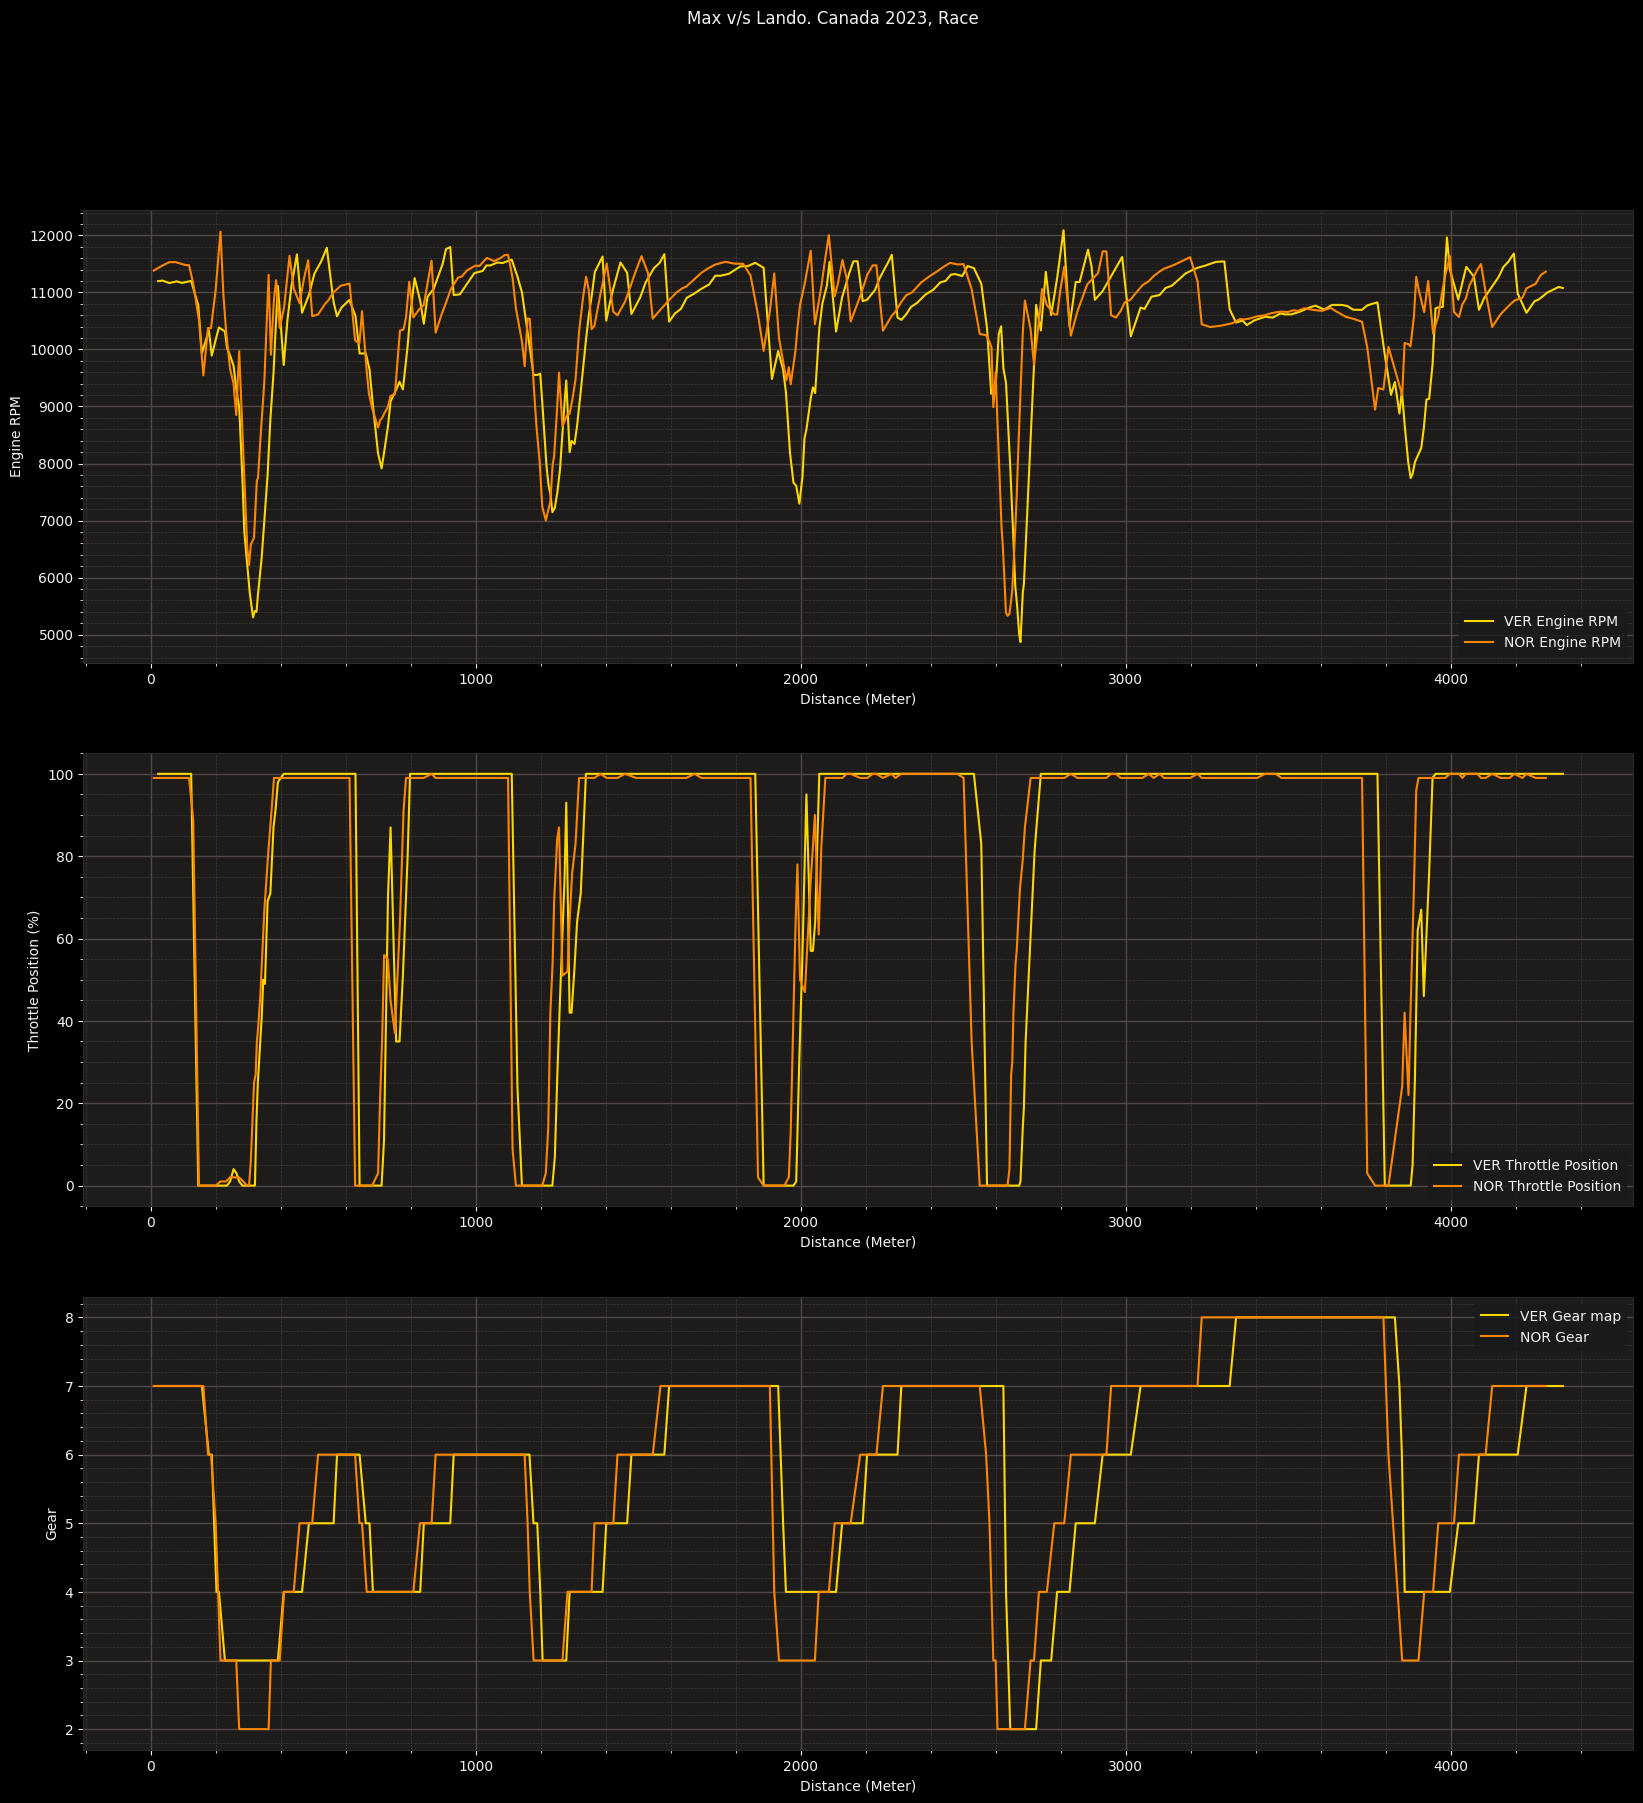

In [14]:
first_rpm = first_car_data['RPM']
first_tps = first_car_data['Throttle']
first_distance = first_car_data['Distance']
first_gear = first_car_data['nGear']

second_rpm = second_car_data['RPM']
second_tps = second_car_data['Throttle']
second_distance = second_car_data['Distance']
second_gear = second_car_data['nGear']

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(20,20), facecolor='black')
fig.suptitle(plot_title)

ax1.plot(first_distance, first_rpm, color=colour_1 , label = '{} Engine RPM'.format(drive_1))
ax1.plot(second_distance, second_rpm, color=colour_2 , label = '{} Engine RPM'.format(drive_2))
ax1.set_xlabel('Distance (Meter)')
ax1.set_ylabel('Engine RPM')
ax1.legend()

ax2.plot(first_distance, first_tps, color=colour_1 , label = '{} Throttle Position'.format(drive_1))
ax2.plot(second_distance, second_tps, color=colour_2 , label = '{} Throttle Position'.format(drive_2))
ax2.set_xlabel('Distance (Meter)')
ax2.set_ylabel('Throttle Position (%)')
ax2.legend()

ax3.plot(first_distance, first_gear, color=colour_1 , label = '{} Gear map'.format(drive_1))
ax3.plot(second_distance, second_gear, color=colour_2 , label = '{} Gear'.format(drive_2))
ax3.set_xlabel('Distance (Meter)')
ax3.set_ylabel('Gear')
ax3.legend()

plt.show()

In [15]:
first_pos_data = first.get_pos_data()
first_pos_data

,Date,Status,X,Y,Z,Source,Time,SessionTime
0,2024-06-09 19:47:44.338,OnTrack,3383,661,128,pos,0 days 00:00:00.073000,0 days 02:41:28.723000
1,2024-06-09 19:47:44.658,OnTrack,3392,519,128,pos,0 days 00:00:00.393000,0 days 02:41:29.043000
2,2024-06-09 19:47:44.918,OnTrack,3395,313,128,pos,0 days 00:00:00.653000,0 days 02:41:29.303000
3,2024-06-09 19:47:45.198,OnTrack,3382,12,129,pos,0 days 00:00:00.933000,0 days 02:41:29.583000
4,2024-06-09 19:47:45.598,OnTrack,3352,-304,130,pos,0 days 00:00:01.333000,0 days 02:41:29.983000
...,...,...,...,...,...,...,...,...
293,2024-06-09 19:48:58.577,OnTrack,3165,1769,128,pos,0 days 00:01:14.312000,0 days 02:42:42.962000
294,2024-06-09 19:48:58.797,OnTrack,3207,1605,129,pos,0 days 00:01:14.532000,0 days 02:42:43.182000
295,2024-06-09 19:48:59.077,OnTrack,3259,1395,129,pos,0 days 00:01:14.812000,0 days 02:42:43.462000
296,2024-06-09 19:48:59.377,OnTrack,3313,1144,128,pos,0 days 00:01:15.112000,0 days 02:42:43.762000


C:\Users\Admin\AppData\Local\Temp\ipykernel_2716\4001366352.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Paired')


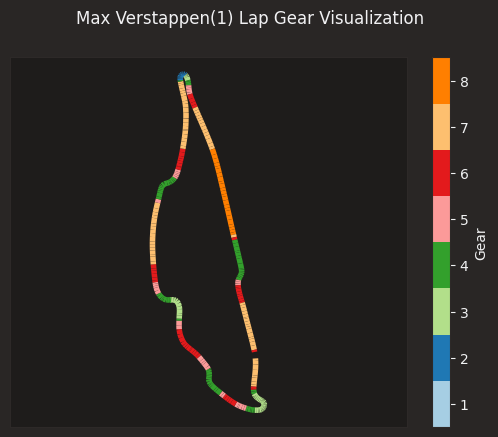

In [16]:
x = np.array(first_pos_data['X'].values)
y = np.array(first_pos_data['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = first_car_data['nGear'].to_numpy().astype(float)

cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(second_plot_title)

cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))

plt.show()

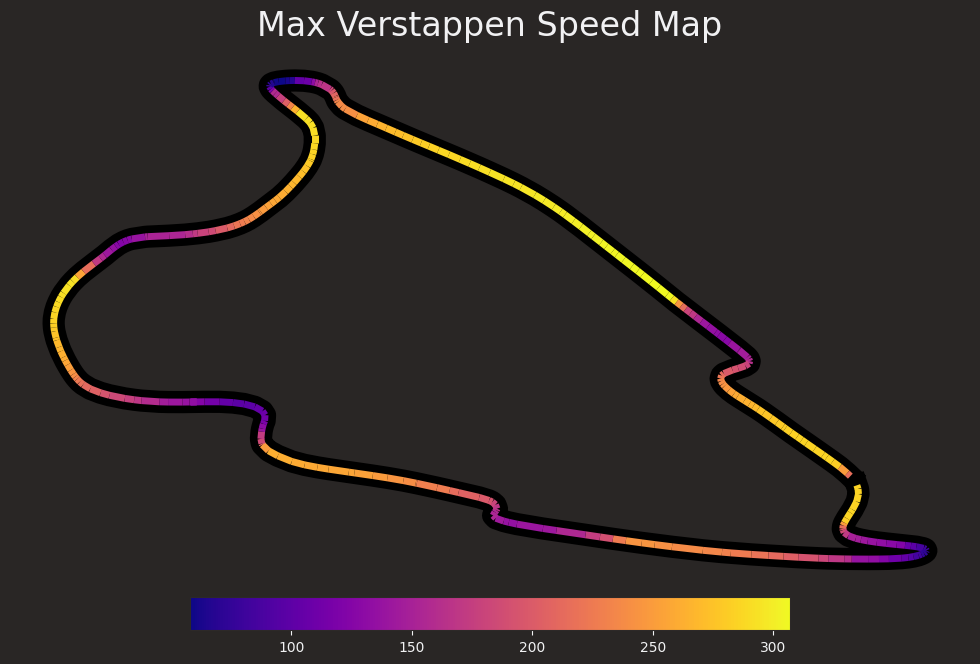

In [17]:
# Get telemetry data
x = np.array(first_pos_data['X'].values)
y = np.array(first_pos_data['Y'].values)
color = first_car_data['Speed']

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(speedmap_first_title, size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(
    np.array(first_pos_data['X'].values),
    np.array(first_pos_data['Y'].values),
    color='black',
    linestyle='-',
    linewidth=16,
    zorder=0
)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=mpl.cm.plasma, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=mpl.cm.plasma, orientation="horizontal")


# Show the plot
plt.show()